In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
usdata = pd.read_pickle("clean_us.pkl")
usdata.head(n=2)

,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,token_title,token_description
0,2017-11-14,CaseyNeistat,22,17:13:01,[SHANtell martin],748374,57527,2966,15954,False,False,False,2017-11-13,"[we, want, to, talk, about, our, marriage]","[shantell, 's, channel, -, -, this, video, in,..."
1,2017-11-14,LastWeekTonight,24,07:30:00,"[last week tonight trump presidency, last week...",2418783,97185,6146,12703,False,False,False,2017-11-13,"[the, trump, presidency, last, week, tonight, ...","[one, year, after, the, presidential, election..."


In [35]:
usdata.columns

Index(['trending_date', 'channel_title', 'category_id', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'publish_date',
       'token_title', 'token_description'],
      dtype='object')

In [36]:
usdata.shape

(7139, 15)

In [37]:
#load categorical data
with open ("US_categories.pickle","rb") as f:
    categories = pickle.load(f)
print(categories)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [38]:
#Makes a subset of categories present in the dataset
cat_name_to_cat_id = {j:i for i,j in categories.items() if i in set(usdata["category_id"])}
cat_id_to_cat_name = {j:i for i,j in cat_name_to_cat_id.items()}

In [54]:
usdata["category_name"] = usdata.category_id.map(cat_id_to_cat_name)

In [56]:
usdata.head(n=2)

,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_date,token_title,token_description,category_name
0,2017-11-14,CaseyNeistat,22,17:13:01,[SHANtell martin],748374,57527,2966,15954,False,False,False,2017-11-13,"[we, want, to, talk, about, our, marriage]","[shantell, 's, channel, -, -, this, video, in,...",People & Blogs
1,2017-11-14,LastWeekTonight,24,07:30:00,"[last week tonight trump presidency, last week...",2418783,97185,6146,12703,False,False,False,2017-11-13,"[the, trump, presidency, last, week, tonight, ...","[one, year, after, the, presidential, election...",Entertainment


### Exploratory data analysis 

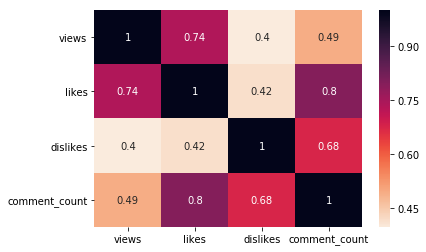

In [39]:
sub = usdata[["views", "likes", "dislikes", "comment_count"]]
corr = sub.corr()
cmap = sns.cm.rocket_r
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap=cmap,
           annot=True)



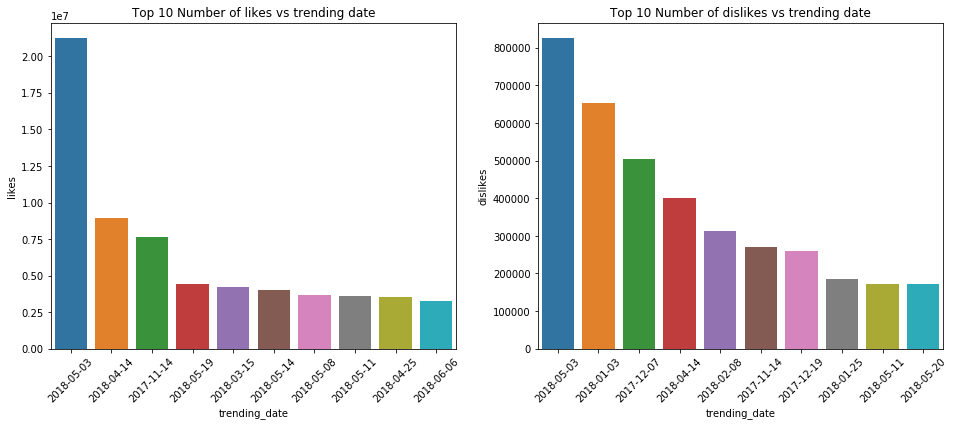

In [40]:
#plt.hist(usdata.trending_date)
agg_reactions = usdata.groupby("trending_date").agg({"likes":"sum", "dislikes":"sum"})
likes_reactions = agg_reactions.sort_values("likes",ascending=False).reset_index()[:10]
dislikes_reactions = agg_reactions.sort_values("dislikes",ascending=False).reset_index()[:10]

#plt.plot(reactions["trending_date"],reactions["likes"])
plt.figure(num=None, figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(likes_reactions["trending_date"].dt.date,y= likes_reactions["likes"])
plt.xticks(rotation=45)
plt.title("Top 10 Number of likes vs trending date")

plt.subplot(1, 2, 2)
sns.barplot(dislikes_reactions["trending_date"].dt.date,y= dislikes_reactions["dislikes"])
plt.xticks(rotation=45)
plt.title("Top 10 Number of dislikes vs trending date")

plt.show()

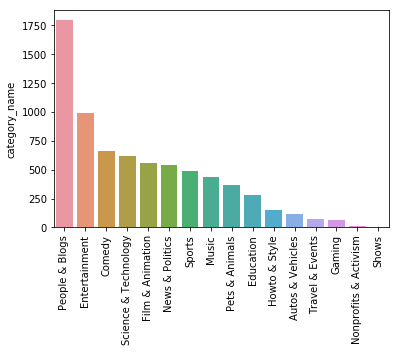

In [71]:
sns.barplot(usdata["category_name"].unique(),usdata["category_name"].value_counts())
plt.xticks(rotation=90)
plt.show()
#The most common category is People & Blogs, followed by Entertainment, then Comedy which has a similar popularity
#to science and Tech.


In [42]:
print(cat_name_to_cat_id)

{'Film & Animation': 1, 'Autos & Vehicles': 2, 'Music': 10, 'Pets & Animals': 15, 'Sports': 17, 'Travel & Events': 19, 'Gaming': 20, 'People & Blogs': 22, 'Comedy': 23, 'Entertainment': 24, 'News & Politics': 25, 'Howto & Style': 26, 'Education': 27, 'Science & Technology': 28, 'Nonprofits & Activism': 29, 'Shows': 43}


#### What is the relationship between trending date and the time of publication?


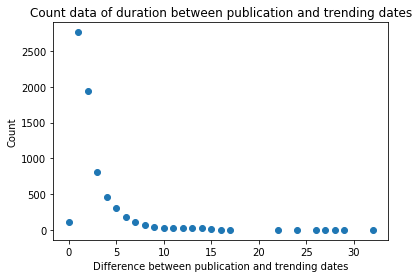

In [43]:
xx = (usdata["trending_date"] - usdata["publish_date"]).astype('timedelta64[D]').value_counts().reset_index()
xx.rename(index=str, columns={"index": "Diff", 0: "count"},inplace=True)
plt.scatter(xx["Diff"][:25], xx["count"][:25])
plt.xlabel("Difference between publication and trending dates")
plt.ylabel("Count")
plt.title("Count data of duration between publication and trending dates")
plt.show()
#xx.head()

In [44]:
grp_cats = usdata.groupby("category_id")
#(grp_cats["trending_date"] - grp_cats["publish_date"]).astype('timedelta64[D]').value_counts().reset_index()


#finish grouping by category and look at the differences between publication and trending dates

#### How similar are the various categories to each other?

In [45]:
mg_cat = usdata.groupby("category_id").agg({"tags":"sum"}).reset_index()

In [46]:
#index category id
ind_to_cat_id = {idx:cat for idx, cat in enumerate(usdata.category_id.unique())}
cat_id_to_ind = {j:i for i,j in ind_to_cat_id.items()}

In [47]:
n_feats = 5000
doc_by_vocab = np.empty([len(mg_cat), n_feats])

def build_vectorizer(max_features, stop_words, max_df=0.8, min_df=10, norm='l2'):
    """Returns a TfidfVectorizer object with the above preprocessing properties.
    
    Params: {max_features: Integer,
             max_df: Float,
             min_df: Float,
             norm: String,
             stop_words: String}
    Returns: TfidfVectorizer
    """
    # YOUR CODE HERE
    tfidfvec = TfidfVectorizer(max_features = max_features, stop_words = stop_words, \
                    max_df = max_df, min_df = min_df, norm=norm)
    return tfidfvec

tfidf_vec = build_vectorizer(n_feats, "english")
doc_by_vocab = tfidf_vec.fit_transform([", ".join(d) for d in mg_cat["tags"]]).toarray()
index_to_vocab = {i:v for i, v in enumerate(tfidf_vec.get_feature_names())}

In [48]:
def get_sim(cat1, cat2, input_doc_mat, cat_name_to_cat_id, cat_id_to_ind):
    """Returns a float giving the cosine similarity of 
       the two categories.
    
    Params: {mov1: String,
             mov2: String,
             input_doc_mat: Numpy Array,
             movie_name_to_index: Dict}
    Returns: Float (Cosine similarity of the two movie transcripts.)
    """
    # YOUR CODE HERE
    catid_1 = cat_name_to_cat_id[cat1]
    catid_2 = cat_name_to_cat_id[cat2]

    script_1 = input_doc_mat[cat_id_to_ind[catid_1],]
    script_2 = input_doc_mat[cat_id_to_ind[catid_2],]
    
    val = np.dot(script_1,script_2.T)/(np.linalg.norm(script_1)*np.linalg.norm(script_2))
        
    return val


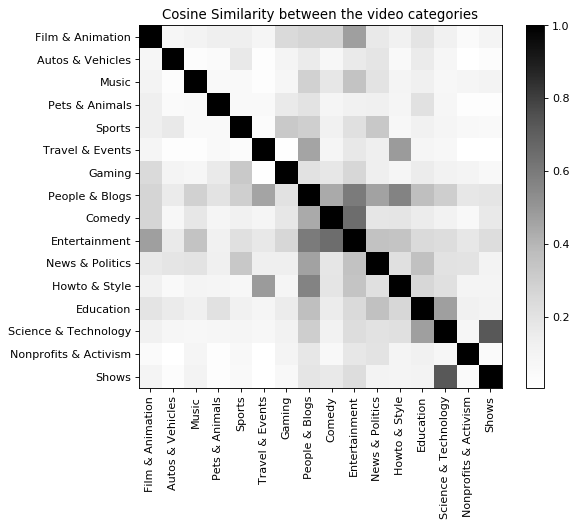

In [35]:
cossim_cat = np.zeros(shape=(len(cat_name_to_cat_id),len(cat_name_to_cat_id)))

for name1,i in cat_name_to_cat_id.items():
    for name2,j in cat_name_to_cat_id.items():
        row = cat_id_to_ind[i]
        col = cat_id_to_ind[j]
        cossim_cat[row,col] = get_sim(name1, name2, doc_by_vocab, cat_name_to_cat_id, cat_id_to_ind)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(cossim_cat, interpolation='none',
           cmap=plt.cm.Greys)
plt.colorbar()
plt.title("Cosine Similarity between the video categories")
plt.xticks(range(len(cat_name_to_cat_id)), cat_name_to_cat_id.keys(), rotation=90)
plt.yticks(range(len(cat_name_to_cat_id)), cat_name_to_cat_id.keys())
plt.show()

In [32]:
for i in range(cossim_cat.shape[0]):
    print(cat_id_to_cat_name[ind_to_cat_id[i]])
    print("---------------------------")
    top3_idx = np.argsort(cossim_cat[i])[::-1][1:4]
    top3_num = np.sort(cossim_cat[i])[::-1][1:4]
    for j,num in zip(top3_idx,top3_num):
        print(cat_id_to_cat_name[ind_to_cat_id[j]] + " - " + str(num))
    print(" ")

People & Blogs
---------------------------
Education - 0.47246933153092907
Pets & Animals - 0.2704451966263699
Music - 0.2690766805068113
 
Entertainment
---------------------------
Howto & Style - 0.18471607486707015
Film & Animation - 0.16458201129687144
Education - 0.1596396216117472
 
Comedy
---------------------------
Education - 0.34938933206202416
Music - 0.28751728962137224
Howto & Style - 0.1961459593970734
 
Science & Technology
---------------------------
Travel & Events - 0.20894355517029894
Music - 0.19715521955924709
Sports - 0.15627696867174865
 
Film & Animation
---------------------------
Howto & Style - 0.3240584551920091
Sports - 0.3194932884181183
Music - 0.2924126884849494
 
News & Politics
---------------------------
Autos & Vehicles - 0.4829809833569685
Music - 0.4585112330204882
Education - 0.1693917847444887
 
Sports
---------------------------
Film & Animation - 0.3194932884181183
Education - 0.263588776029997
People & Blogs - 0.2449138154260436
 
Music
------

#### What is the relationship between number of comments and up/down-votes?

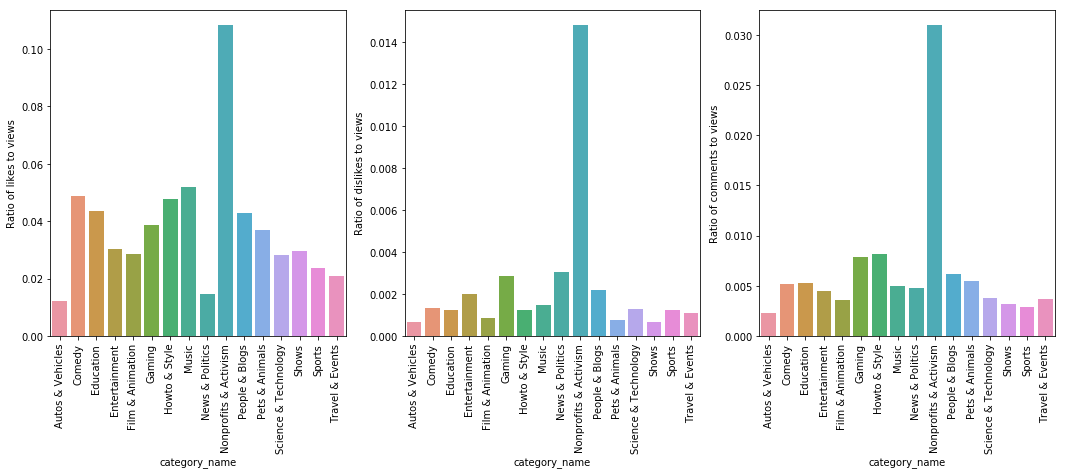

In [63]:

dis_like = usdata.groupby("category_name").agg({"likes":"sum", "dislikes":"sum","views":"sum",\
                                              "comment_count": "sum"}).reset_index()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.barplot(dis_like["category_name"],dis_like["likes"]/dis_like["views"])
plt.ylabel("Ratio of likes to views")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(dis_like["category_name"],dis_like["dislikes"]/dis_like["views"])
plt.ylabel("Ratio of dislikes to views")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(dis_like["category_name"],dis_like["comment_count"]/dis_like["views"])
plt.ylabel("Ratio of comments to views")
plt.xticks(rotation=90)

plt.show()


In general, videos across all categories are more likely to be liked than disliked. It is also evident that the number of comments have a greater ratio than the dislikes. 

Nonprofts and Activism have the highest ratios among likes, dislikes and comments. People who view videos related to nonprofits and activism are more likely to have a reaction due to the nature of content that is generally portrayed in the video. 

#### Relationship between length of title and popularity 